<a href="https://colab.research.google.com/github/Huhan001/larning/blob/main/multi_image_clasifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#start by importing all libraries to be used 

import tensorflow as tf
import tensorflow_datasets as dtfs
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

#for zipfile extraction
import os 

In [2]:
#load file
link = 'https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip'
zip_dir = tf.keras.utils.get_file(fname= '10_food_classes_10_percent.zip', origin=link, extract=True)

168546183/168546183 [==============================] - 5s 0us/step


In [3]:
zip_base = os.path.dirname(zip_dir)
!find $zip_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/10_food_classes_10_percent
/root/.keras/datasets/10_food_classes_10_percent/test
/root/.keras/datasets/10_food_classes_10_percent/test/chicken_curry
/root/.keras/datasets/10_food_classes_10_percent/test/sushi
/root/.keras/datasets/10_food_classes_10_percent/test/ramen
/root/.keras/datasets/10_food_classes_10_percent/test/pizza
/root/.keras/datasets/10_food_classes_10_percent/test/chicken_wings
/root/.keras/datasets/10_food_classes_10_percent/test/steak
/root/.keras/datasets/10_food_classes_10_percent/test/grilled_salmon
/root/.keras/datasets/10_food_classes_10_percent/test/fried_rice
/root/.keras/datasets/10_food_classes_10_percent/test/ice_cream
/root/.keras/datasets/10_food_classes_10_percent/test/hamburger
/root/.keras/datasets/10_food_classes_10_percent/train
/root/.keras/datasets/10_food_classes_10_percent/train/chicken_curry
/root/.keras/datasets/10_food_classes_10_percent/train/sushi
/root/.keras/datasets/10_food_classes_10_percent/tra

In [4]:
data_dir = os.path.join(zip_base, '10_food_classes_10_percent')
!find $data_dir -type d -print

/root/.keras/datasets/10_food_classes_10_percent
/root/.keras/datasets/10_food_classes_10_percent/test
/root/.keras/datasets/10_food_classes_10_percent/test/chicken_curry
/root/.keras/datasets/10_food_classes_10_percent/test/sushi
/root/.keras/datasets/10_food_classes_10_percent/test/ramen
/root/.keras/datasets/10_food_classes_10_percent/test/pizza
/root/.keras/datasets/10_food_classes_10_percent/test/chicken_wings
/root/.keras/datasets/10_food_classes_10_percent/test/steak
/root/.keras/datasets/10_food_classes_10_percent/test/grilled_salmon
/root/.keras/datasets/10_food_classes_10_percent/test/fried_rice
/root/.keras/datasets/10_food_classes_10_percent/test/ice_cream
/root/.keras/datasets/10_food_classes_10_percent/test/hamburger
/root/.keras/datasets/10_food_classes_10_percent/train
/root/.keras/datasets/10_food_classes_10_percent/train/chicken_curry
/root/.keras/datasets/10_food_classes_10_percent/train/sushi
/root/.keras/datasets/10_food_classes_10_percent/train/ramen
/root/.keras/

In [12]:
training_dir = os.path.join(data_dir, 'train')
testing_dir = os.path.join(data_dir, 'test')
!find $testing_dir -type d -print

/root/.keras/datasets/10_food_classes_10_percent/test
/root/.keras/datasets/10_food_classes_10_percent/test/chicken_curry
/root/.keras/datasets/10_food_classes_10_percent/test/sushi
/root/.keras/datasets/10_food_classes_10_percent/test/ramen
/root/.keras/datasets/10_food_classes_10_percent/test/pizza
/root/.keras/datasets/10_food_classes_10_percent/test/chicken_wings
/root/.keras/datasets/10_food_classes_10_percent/test/steak
/root/.keras/datasets/10_food_classes_10_percent/test/grilled_salmon
/root/.keras/datasets/10_food_classes_10_percent/test/fried_rice
/root/.keras/datasets/10_food_classes_10_percent/test/ice_cream
/root/.keras/datasets/10_food_classes_10_percent/test/hamburger


In [13]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


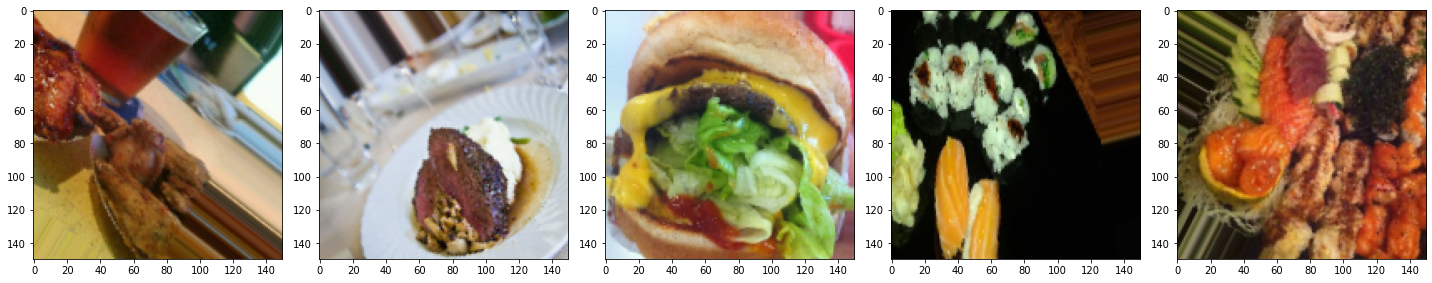

In [14]:
batchsize = 100
imageshape = 150

train_image_generator  = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')  # Generator for our training data

validation_image_generator = ImageDataGenerator(rescale=1./255)  # Generator for our validation data


train_data_gen = train_image_generator.flow_from_directory(batch_size=batchsize,
                                                              directory=training_dir,
                                                              shuffle=True,
                                                              target_size=(imageshape,imageshape), #(150,150)
                                                              class_mode='categorical')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batchsize,
                                                 directory=testing_dir,
                                                 target_size=(imageshape, imageshape),
                                                 class_mode='categorical')
sample_training_images, _ = next(train_data_gen) 
plotImages(sample_training_images[:5])

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation= tf.keras.activations.softmax)
])

In [16]:
model.compile(optimizer= tf.keras.optimizers.legacy.Adam(),
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [17]:
history = model.fit_generator(
    train_data_gen,
    epochs= 5,
    validation_data=val_data_gen,
    steps_per_epoch= len(train_data_gen),
    validation_steps= len(val_data_gen)
)

<ipython-input-17-f90320ca2f1b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/5
8/8 [==============================] - 17s 2s/step - loss: 2.3519 - accuracy: 0.0920 - val_loss: 2.3027 - val_accuracy: 0.1004
Epoch 2/5
8/8 [==============================] - 17s 2s/step - loss: 2.3056 - accuracy: 0.0960 - val_loss: 2.2991 - val_accuracy: 0.1116
Epoch 3/5
8/8 [==============================] - 16s 2s/step - loss: 2.3004 - accuracy: 0.1067 - val_loss: 2.2904 - val_accuracy: 0.1060
Epoch 4/5
8/8 [==============================] - 17s 2s/step - loss: 2.2917 - accuracy: 0.1213 - val_loss: 2.2602 - val_accuracy: 0.1524
Epoch 5/5
8/8 [==============================] - 17s 2s/step - loss: 2.2476 - accuracy: 0.1693 - val_loss: 2.1539 - val_accuracy: 0.2224
